In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import re
from textblob import TextBlob
import string

In [3]:
df = pd.read_csv(r"C:\Users\ASUS\Documents\SEMESTER 4\RM\instagram.csv")


In [4]:
df.head()

review_description  rating      review_date
0  The app is good for connecting with friends, f...       3  7/11/2023 23:57
1  Used to be my favorite social media app, but "...       2  7/22/2023 21:37
2  Instagram is the best of all the social media....       5   7/25/2023 3:24
3  I love this app.. but as of late, I have been ...       2    7/9/2023 4:49
4  Used to be a great app but there are so many m...       3  7/17/2023 16:47

In [5]:
df.tail()

review_description  rating  \
210536  I dislike the ads and suggested pages and I di...       3   
210537  I love the app but lately my dms have been mes...       2   
210538  Fun and addictive. Let's me see new ideas for ...       5   
210539  User friendly and all things are available for...       5   
210540  There are issues when you upload a story from ...       1   

            review_date  
210536   4/8/2021 22:45  
210537   3/10/2019 0:40  
210538   9/22/2019 1:12  
210539  10/21/2018 3:16  
210540   6/2/2020 17:43

In [6]:
df.shape

(210541, 3)

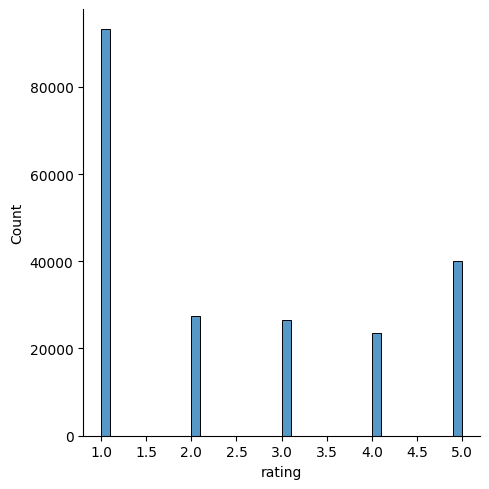

In [7]:
sns.displot(df['rating'])

In [8]:
print(df.columns)

if 'review_date' in df.columns:
    print("Column 'review_date' exists in the DataFrame.")
else:
    print("Column 'review_date' does not exist in the DataFrame.")


Index(['review_description', 'rating', 'review_date'], dtype='object')
Column 'review_date' exists in the DataFrame.


In [9]:
df

review_description  rating  \
0       The app is good for connecting with friends, f...       3   
1       Used to be my favorite social media app, but "...       2   
2       Instagram is the best of all the social media....       5   
3       I love this app.. but as of late, I have been ...       2   
4       Used to be a great app but there are so many m...       3   
...                                                   ...     ...   
210536  I dislike the ads and suggested pages and I di...       3   
210537  I love the app but lately my dms have been mes...       2   
210538  Fun and addictive. Let's me see new ideas for ...       5   
210539  User friendly and all things are available for...       5   
210540  There are issues when you upload a story from ...       1   

            review_date  
0       7/11/2023 23:57  
1       7/22/2023 21:37  
2        7/25/2023 3:24  
3         7/9/2023 4:49  
4       7/17/2023 16:47  
...                 ...  
210536   4/8/2021 22:45  
210537   3/10/2019 0:40  
210538   9/22/2019 1:12  
210539  10/21/2018 3:16  
210540   6/2/2020 17:43  

[210541 rows x 3 columns]

In [10]:
cor=df.corr()
cor

rating
rating     1.0

In [11]:
from sklearn import preprocessing
df = df.drop('review_date', axis=1)
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [12]:
X

review_description
0       The app is good for connecting with friends, f...
1       Used to be my favorite social media app, but "...
2       Instagram is the best of all the social media....
3       I love this app.. but as of late, I have been ...
4       Used to be a great app but there are so many m...
...                                                   ...
210536  I dislike the ads and suggested pages and I di...
210537  I love the app but lately my dms have been mes...
210538  Fun and addictive. Let's me see new ideas for ...
210539  User friendly and all things are available for...
210540  There are issues when you upload a story from ...

[210541 rows x 1 columns]

In [13]:
Y

0         3
1         2
2         5
3         2
4         3
         ..
210536    3
210537    2
210538    5
210539    5
210540    1
Name: rating, Length: 210541, dtype: int64

In [14]:
# sentiment_data = X[["review_description", "rating"]]
sentiment_data = X[["review_description"]].dropna()
sentiment_data = sentiment_data.join(Y)
print(sentiment_data)

                                       review_description  rating
0       The app is good for connecting with friends, f...       3
1       Used to be my favorite social media app, but "...       2
2       Instagram is the best of all the social media....       5
3       I love this app.. but as of late, I have been ...       2
4       Used to be a great app but there are so many m...       3
...                                                   ...     ...
210536  I dislike the ads and suggested pages and I di...       3
210537  I love the app but lately my dms have been mes...       2
210538  Fun and addictive. Let's me see new ideas for ...       5
210539  User friendly and all things are available for...       5
210540  There are issues when you upload a story from ...       1

[210541 rows x 2 columns]


In [15]:
sentiment_data.isnull().sum()

review_description    0
rating                0
dtype: int64

In [16]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stemmer = nltk.SnowballStemmer('english')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
# Preprocessing
stopword=set(stopwords.words('english'))
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
sentiment_data['review_description'] = sentiment_data['review_description'].apply(clean)


In [ ]:
def remove_emoticons(text):
    if isinstance(text, str):
        emoticon_pattern = re.compile("["
                                      u"\U0001F600-\U0001F64F"  # emoticons
                                      u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                      u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                      u"\U0001F700-\U0001F77F"  # alchemical symbols
                                      u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                                      u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                                      u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                                      u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                                      u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                                      u"\U00002702-\U000027B0"  # Dingbats
                                      u"\U000024C2-\U0001F251"
                                      "]+", flags=re.UNICODE)
        return emoticon_pattern.sub(r'', text)
    else:
        return text

sentiment_data['review_description'] = sentiment_data['review_description'].apply(remove_emoticons)
sentiment_data.columns = [col.lower() for col in sentiment_data.columns]

# Menampilkan hasil
print(sentiment_data)

                                       review_description  rating
0       app good connect friend famili even potenti bu...       3
1       use favorit social media app improv made harde...       2
2       instagram best social media ig post platform f...       5
3       love app late problem screen background turn w...       2
4       use great app mani bug issu ever plus ruin use...       3
...                                                   ...     ...
210536  dislik ad suggest page dislik post dont show f...       3
210537  love app late dms mess bad take send repli don...       2
210538  fun addict let see new idea craft bunch cool s...       5
210539  user friend thing avail entertain connect peop...       5
210540  issu upload stori redmi  view friend appear cr...       1

[210541 rows x 2 columns]


In [ ]:
rating_mapping = {1: 'Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Positive'}
sentiment_data['rating'] = sentiment_data['rating'].map(rating_mapping)

In [ ]:
sentiment_data.head(10)

review_description    rating
0  app good connect friend famili even potenti bu...   Neutral
1  use favorit social media app improv made harde...  Negative
2  instagram best social media ig post platform f...  Positive
3  love app late problem screen background turn w...  Negative
4  use great app mani bug issu ever plus ruin use...   Neutral
5  app glitch alot video play instead show black ...  Negative
6  like app lot messag part app frustrat sometim ...   Neutral
7  eventhough sometim work time doesnt qualiti vi...  Negative
8  im sure point leav review accomplish recent re...  Negative
9  app mani frustrat aspect theme wont work work ...  Negative

In [ ]:
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
ps = PorterStemmer()

In [ ]:
def stem_words(text):
    y = []
    for word in text.split():  # Split the text into words
        y.append(ps.stem(word))
    return y
sentiment_data['review_description'] = sentiment_data['review_description'].apply(stem_words)

print(sentiment_data)

                                       review_description    rating
0       [app, good, connect, friend, famili, even, pot...   Neutral
1       [use, favorit, social, media, app, improv, mad...  Negative
2       [instagram, best, social, media, ig, post, pla...  Positive
3       [love, app, late, problem, screen, background,...  Negative
4       [use, great, app, mani, bug, issu, ever, plu, ...   Neutral
...                                                   ...       ...
210536  [dislik, ad, suggest, page, dislik, post, dont...   Neutral
210537  [love, app, late, dm, mess, bad, take, send, r...  Negative
210538  [fun, addict, let, see, new, idea, craft, bunc...  Positive
210539  [user, friend, thing, avail, entertain, connec...  Positive
210540  [issu, upload, stori, redmi, view, friend, app...  Negative

[210541 rows x 2 columns]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, FunctionTransformer

In [ ]:
def join_back(list_input):
    return " ".join(list_input)

sentiment_data['review_description']=sentiment_data['review_description'].apply(join_back)
X=sentiment_data.iloc[:,0:1].values

In [ ]:
X.shape

(210541, 1)

In [ ]:
cv=CountVectorizer(max_features=1000)

In [ ]:
X = cv.fit_transform(sentiment_data['review_description']).toarray()

X.shape

(210541, 1000)

In [ ]:
X[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
X[0].max()

3

In [ ]:
y=sentiment_data.iloc[:,-1].values

In [ ]:
y

array(['Neutral', 'Negative', 'Positive', ..., 'Positive', 'Positive',
       'Negative'], dtype=object)

In [ ]:
y.shape

(210541,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print("Train set",X_train.shape, y_train.shape)
print("Test set",X_test.shape, y_test.shape)

Train set (168432, 1000) (168432,)
Test set (42109, 1000) (42109,)


In [ ]:
clf1 = MultinomialNB()

In [ ]:
clf1.fit(X_train,y_train)

MultinomialNB()

In [ ]:
y_pred1=clf1.predict(X_test)

In [ ]:
y_pred1.shape

(42109,)

In [ ]:
y_test.shape

(42109,)

In [ ]:
print("Gaussian NB acc=",accuracy_score(y_test,y_pred1))

Gaussian NB acc= 0.7216272055855043


In [ ]:
def calculate_sentiments(ds):
    sentiments = TextBlob(ds['review_description']).sentiment
    return pd.Series([sentiments.subjectivity, sentiments.polarity])

In [ ]:
sentiment_data[['Subjectivity', 'Polarity']] = sentiment_data.apply(calculate_sentiments, axis = 1)
sentiment_data.head()

review_description    rating  Subjectivity  \
0  app good connect friend famili even potenti bu...   Neutral      0.369048   
1  use favorit social media app improv made harde...  Negative      0.085000   
2  instagram best social media ig post platform f...  Positive      0.244444   
3  love app late problem screen background turn w...  Negative      0.446667   
4  use great app mani bug issu ever plu ruin user...   Neutral      0.258730   

   Polarity  
0  0.052381  
1 -0.065000  
2  0.305556  
3  0.090000  
4  0.186508

In [ ]:
def categorize_sentiment(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

In [ ]:
sentiment_data['Sentiment Analysis'] = sentiment_data['Polarity'].apply(categorize_sentiment)
sentiment_data.head()

review_description    rating  Subjectivity  \
0  app good connect friend famili even potenti bu...   Neutral      0.369048   
1  use favorit social media app improv made harde...  Negative      0.085000   
2  instagram best social media ig post platform f...  Positive      0.244444   
3  love app late problem screen background turn w...  Negative      0.446667   
4  use great app mani bug issu ever plu ruin user...   Neutral      0.258730   

   Polarity Sentiment Analysis  
0  0.052381           Positive  
1 -0.065000           Negative  
2  0.305556           Positive  
3  0.090000           Positive  
4  0.186508           Positive

<AxesSubplot:xlabel='Polarity', ylabel='Density'>

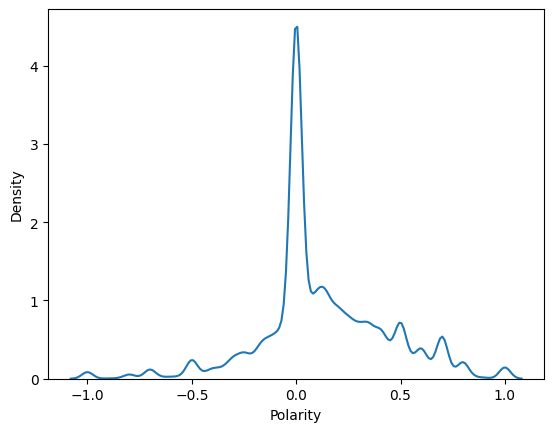

In [ ]:
sns.kdeplot(data = sentiment_data, x = "Polarity")

<AxesSubplot:xlabel='Polarity', ylabel='Count'>

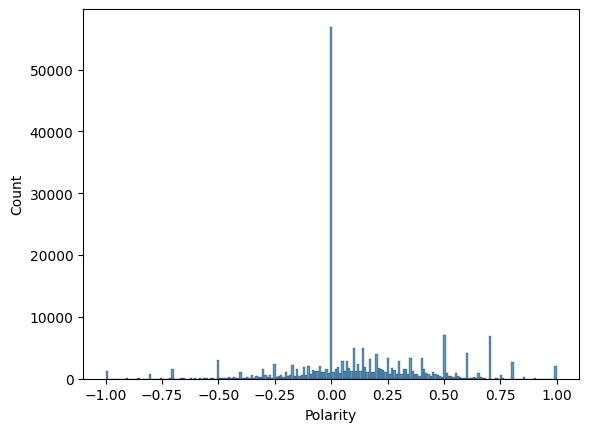

In [ ]:
sns.histplot(data = sentiment_data, x = 'Polarity')

<AxesSubplot:xlabel='Sentiment Analysis', ylabel='count'>

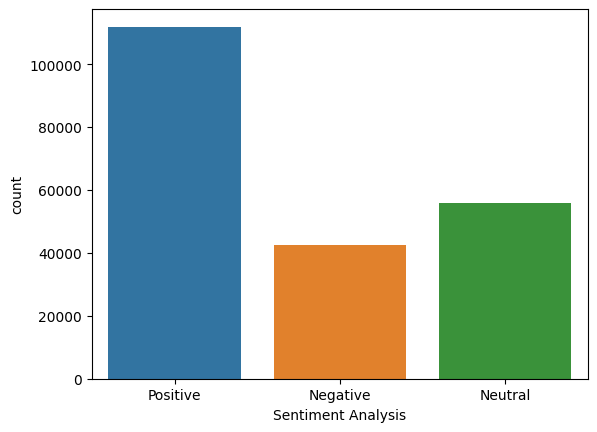

In [ ]:
sns.countplot(data = sentiment_data, x = 'Sentiment Analysis')

In [ ]:
#model
dataset = sentiment_data
dataset.rename(columns= {'review_description' : 'text'}, inplace = True)
dataset = dataset[['text', 'Sentiment Analysis']]
dataset

text Sentiment Analysis
0       app good connect friend famili even potenti bu...           Positive
1       use favorit social media app improv made harde...           Negative
2       instagram best social media ig post platform f...           Positive
3       love app late problem screen background turn w...           Positive
4       use great app mani bug issu ever plu ruin user...           Positive
...                                                   ...                ...
210536  dislik ad suggest page dislik post dont show f...           Negative
210537  love app late dm mess bad take send repli dont...           Negative
210538  fun addict let see new idea craft bunch cool s...           Positive
210539  user friend thing avail entertain connect peop...            Neutral
210540  issu upload stori redmi view friend appear cro...            Neutral

[210541 rows x 2 columns]

In [ ]:
le = LabelEncoder()
dataset['Sentiment Analysis'] = le.fit_transform(dataset['Sentiment Analysis'])

C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X = dataset['text']
y = dataset['Sentiment Analysis']
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
the_pipeline = Pipeline([
    ('vectorizing', CountVectorizer(max_features=5000)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

NameError: name 'Pipeline' is not defined

In [ ]:
the_pipeline.fit(xtrain, ytrain)

Pipeline(steps=[('vectorizing', CountVectorizer(max_features=1000)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [ ]:
prediction = the_pipeline.predict(xtest)

In [ ]:
confusion_matrix(ytest, prediction)

array([[ 3045,   401,  5034],
       [   30,  6169,  4997],
       [  117,   224, 22092]], dtype=int64)

In [ ]:
print(classification_report(ytest, prediction))

              precision    recall  f1-score   support

           0       0.95      0.36      0.52      8480
           1       0.91      0.55      0.69     11196
           2       0.69      0.98      0.81     22433

    accuracy                           0.74     42109
   macro avg       0.85      0.63      0.67     42109
weighted avg       0.80      0.74      0.72     42109



In [ ]:
prediction = the_pipeline.predict(xtrain)

In [ ]:
print(classification_report(ytrain, prediction))

              precision    recall  f1-score   support

           0       0.96      0.37      0.54     34144
           1       0.91      0.56      0.69     44820
           2       0.69      0.98      0.81     89468

    accuracy                           0.75    168432
   macro avg       0.85      0.64      0.68    168432
weighted avg       0.80      0.75      0.72    168432

